# Исходные данные

Данные, с которыми проводится работа - таблица формата CSV c информацией сервиса Яндекс Недвижимость за несколько лет.

В таблице присутствует следующая информация:

 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 - balcony — число балконов
 - ceiling_height — высота потолков (м)
 - cityCenters_nearest — расстояние до центра города (м)
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 - first_day_exposition — дата публикации
 - floor — этаж
 - floors_total — всего этажей в доме
 - is_apartment — апартаменты (булев тип)
 - kitchen_area — площадь кухни в квадратных метрах (м²)
 - last_price — цена на момент снятия с публикации
 - living_area — жилая площадь в квадратных метрах (м²)
 - locality_name — название населённого пункта
 - open_plan — свободная планировка (булев тип)
 - parks_around3000 — число парков в радиусе 3 км
 - parks_nearest — расстояние до ближайшего парка (м)
 - ponds_around3000 — число водоёмов в радиусе 3 км
 - ponds_nearest — расстояние до ближайшего водоёма (м)
 - rooms — число комнат
 - studio — квартира-студия (булев тип)
 - total_area — общая площадь квартиры в квадратных метрах (м²)
 - total_images — число фотографий квартиры в объявлении

# Задачи

 - Выполнить предобработку данных и изучить их,

 - Найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

# Ход исследования

In [2]:
# Импорт библиотек

import pandas as pd
import matplotlib.pylab as plt

In [3]:
# Чтение и сохранение датасета в переменную

data = pd.read_csv('real_estate_data.csv', sep='	')

## Обзор данных 

In [4]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

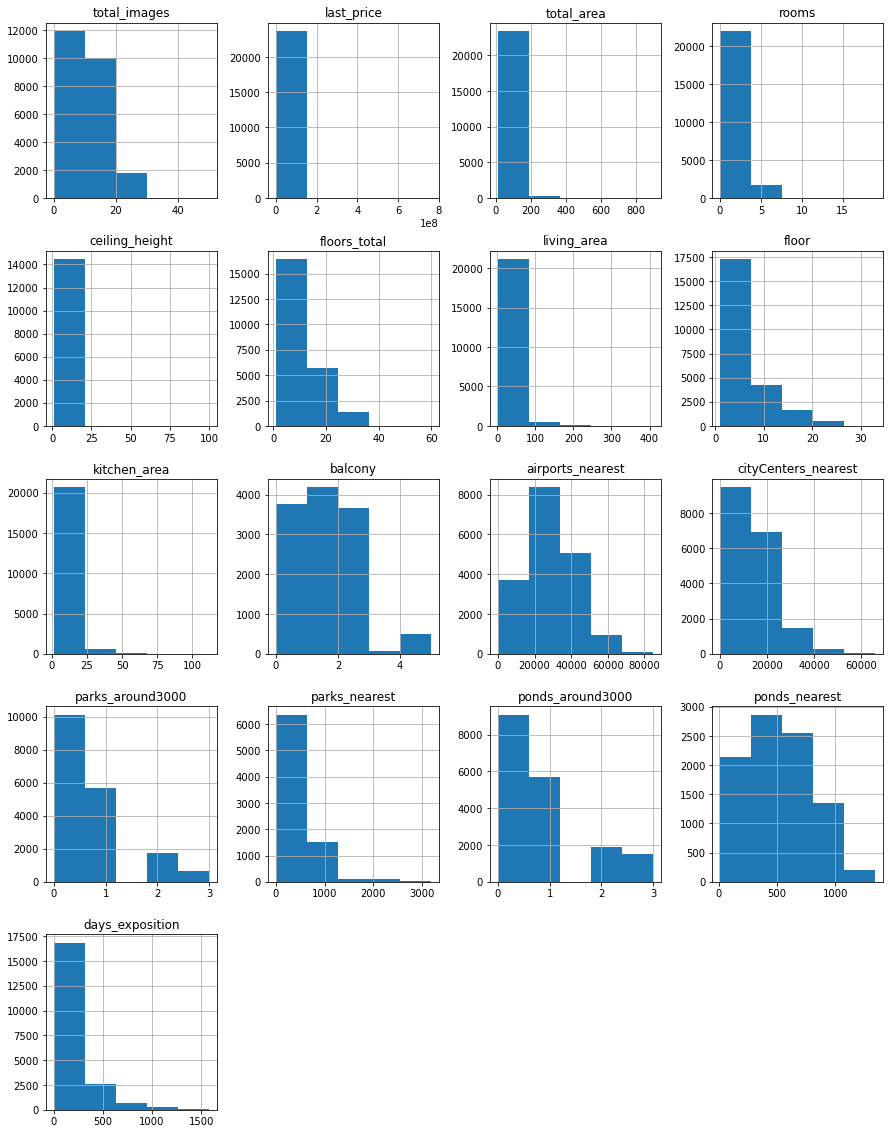

In [6]:
data.hist(bins=5, figsize=(15, 20))

<div class="alert alert-info"> 
 
 - Необходима работа над аномальными и пропущенными значениями, неявными дубликатами, а также изменение типов данных в некоторых колонках.

## Предобработка данных 

### Аномальные значения 

In [5]:
## Колонка ceiling_height

#Сгруппируем датасет по высоте полотков и выведем распределение

data = data.sort_values(by='ceiling_height')
data.groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 183, dtype: int64

<AxesSubplot:>

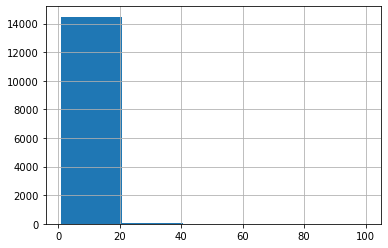

In [8]:
## Колонка ceiling_height

# Построим гистограмму для лучшей визуализации данных

data['ceiling_height'].hist(bins=5)

In [9]:
## Колонка ceiling_height

# Высота потолков в 1, 20-100 метров явная ошибка. В диапазоне 20-30 метров произведем корректировку (как 2.0-3.0)
# Строки с аномальными значениями, не поддающимися корректировке удалим (до 2 метров)

for height in data.loc[data['ceiling_height'] > 10, 'ceiling_height']:
    # Функция проходит по каждому значению среза, где полотки выше 10 м, и делит это значением на 10.
    data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = height / 10

data['ceiling_height'].min()

1.0

In [10]:
## Колонка ceiling_height

# Оставляем только те, строки, где высота потолков больше 2 м (строки с пропущенными значениями не удаляем)     
data = data.loc[(data['ceiling_height'] >= 2)|(data['ceiling_height'].isna())]

# Проверяем минимальное значение по получившемуся датасету
data['ceiling_height'].min()

2.0

In [11]:
## Колонка living_area

# Проверим распределение значений колонки 

data.groupby('living_area')['living_area'].count()

living_area
2.0      2
3.0      2
5.0      1
5.4      1
6.0      1
        ..
322.3    1
332.0    1
347.5    1
409.0    1
409.7    1
Name: living_area, Length: 1782, dtype: int64

In [12]:
## Колонка living_area

# Жилая площадь до 5 м выглядит подозрительно, проверим распределение общей S квартир

data.groupby('total_area')['total_area'].count()

total_area
12.0     1
13.0     3
13.2     1
14.0     1
15.0     2
        ..
590.0    1
618.0    1
631.0    1
631.2    1
900.0    1
Name: total_area, Length: 2181, dtype: int64

In [13]:
## Колонка living_area
## Колонка total_area

# Удалим строки, где жилая S меньше 5м и общая S - 0м

data = data.loc[data['living_area'] > 5]
data = data.loc[data['total_area'] != 0]

### Пропуски 

<div class="alert alert-warning">

Все колонки, где есть пропуски:

 - ceiling_height        14504
 - floors_total          23613 
 - living_area           21796 
 - is_apartment          2775  
 - kitchen_area          21421 
 - balcony               12180 
 - locality_name         23650  
 - airports_nearest      18157 
 - cityCenters_nearest   18180 
 - parks_around3000      18181 
 - parks_nearest         8079 
 - ponds_around3000      18181 
 - ponds_nearest         9110 
 - days_exposition       20518 

In [15]:
## Колонка ceiling_height

# Заполним пустые значения в колонке медианой и проверим отсутствие пропусков

for ceil in data['ceiling_height'].unique():
    data.loc[data['ceiling_height'].isna(), 'ceiling_height'] =\
    data.loc[~data['ceiling_height'].isna(), 'ceiling_height'].median()
    
data['ceiling_height'].isna().sum()    

0

<div class="alert alert-info">

Заполнить колонку floors_total(кол-во этажей в доме) медианными или средними значениями было бы неправильно, т.к. выборка жилья в датафрейме и по городу, и по области - поэтому существует очень большой разброс и возможны сильные отличия в зависимости от населенного пункта.
Кроме того, существует колонка floor (этаж, на котором находится квартира), по которой можно осуществлять работу. 
    
 Поэтому пропуски в колонке floors_total будут оставлены.

In [16]:
## Колонка living_area

# В датасете есть колонки общей S, жилой S и S кухни, причем общая S есть для всех строк 
# Примерную жилую площадь можно посчитать как разность общей площади и площади кухни (пренебрегая санузлами и проч.)
# Оценим целесообразность, узнав сколько пропусков можно заполнить таким образом.

data.loc[(data['living_area'].isna()) & ~(data['kitchen_area'].isna()), 'total_area'].count()

0

In [17]:
## Колонка living_area

# Напишем цикл для заполнения пропусков и выведем оставщееся кол-во пропусков колонки 

for value in data['living_area'].unique():
    # Цикл сортирует датасет, где есть пропуски в жилой S и нет пропусков в S кухни и заполняет их разностью общей S и S кухни
    data.loc[(data['living_area'].isna()) & ~(data['kitchen_area'].isna()), 'living_area'] = \
    data['total_area'] - data['kitchen_area']

data['living_area'].isna().sum()

0

<AxesSubplot:>

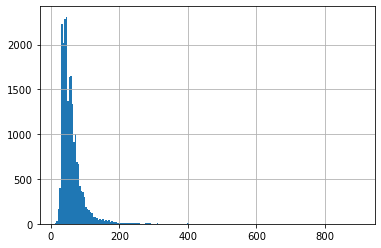

In [18]:
## Колонка living_area

# Оставшиеся пропуски заполним медианным значением по категориям общей площади
# Посмотрим на распределение общей площади для создания сортировки

data['total_area'].hist(bins=200)

In [19]:
## Колонка living_area

# Зададим шаг для функции 10, так как квартир до 100 кв.м. очень много. 
# Функция будет категоризовать общую площадь в шаг 10 и заполнять пропуски медианным значением для полученного среза
# Таким образом пропуски жилой S квартир с общей S 1-10м будет заполнена медианой жилой S квартир общей S 1-10 м. 

data.sort_values(by='total_area', inplace=True)
step=10

for value in data['total_area'].unique():
    # Сортируем датасет с пустыми значениями жилой S, где общая S больше текущей и меньше текущей+10.
    # Заполняем пустые значения этого шага медианой по полученному срезу
    data.loc[(data['total_area'] >= value)&(data['total_area'] <= value+step)&(data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] >= value)&(data['total_area'] <= value+step)& ~(data['living_area'].isna()), 'living_area'].median()
    
# Проверим отсутствие пропусков    
data['living_area'].isna().sum()

0

In [20]:
## Колонка is_apartment 

# Возвращает булево значение по наличию апартаментов
# Поэтому логично предположить, что пропущенные значения - не апартаменты
# Заменим все пропуски в этой колонке на False, затем удостоверимся в отсутствии пропусков

data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].unique()

array([False,  True])

In [21]:
## Колонка kitchen_area

# Посмотрим выборку по квартирам, где пропущена площадь кухни

display(data.loc[data['kitchen_area'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000.0,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,False,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
19807,0,3800000.0,13.0,2018-07-04T00:00:00,1,2.65,5.0,10.0,3,False,...,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
8886,10,2450000.0,15.5,2018-08-22T00:00:00,0,2.65,5.0,10.0,2,False,...,NaN,NaN,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9412,5,2100000.0,16.0,2017-12-10T00:00:00,0,2.65,6.0,13.0,1,False,...,NaN,NaN,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0
716,5,1500000.0,17.0,2017-06-07T00:00:00,0,2.70,9.0,12.0,1,False,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5631,14,99000000.0,280.0,2018-01-19T00:00:00,3,2.65,4.0,160.0,4,False,...,NaN,NaN,Санкт-Петербург,21178.0,1281.0,2.0,283.0,3.0,22.0,NaN
11436,4,24000000.0,316.3,2015-03-25T00:00:00,8,2.65,5.0,187.0,5,False,...,NaN,0.0,Санкт-Петербург,24555.0,5129.0,0.0,NaN,1.0,934.0,542.0
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.50,3.0,183.0,3,False,...,NaN,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
7674,20,131000000.0,380.0,2016-09-23T00:00:00,5,3.90,6.0,150.0,4,False,...,NaN,1.0,Санкт-Петербург,25801.0,4504.0,2.0,161.0,1.0,635.0,901.0


<div class="alert alert-info">

В полученной таблице довольно большой разброс по площади всей квартиры - встречается и 20, и 60 м.
Поэтому нельзя сделать вывод, что кухни однозначно нет, например, из-за слишком маленькой площади квартиры.
Кухня может не выделяться отдельно, если квартира имеет планировку студии, либо кухня может быть в общем пользовании.
Поэтому пропуски можно оставить.

In [22]:
## Колонка balcony

# Логично предположить, что пропущенные значения в этой колонке означают, что балкона нет.
# Заменим пропуски числом 0 и удостоверимся в отсутствии пропусков.

data['balcony'].fillna(0, inplace=True)
data['balcony'].unique()

array([0., 1., 2., 3., 5., 4.])

In [23]:
## Колонка locality_name

# Учтем, что расстояние от Дворцовой площади Питера до его самой ближайшей границы на востоке (использовали ст.Ржевка) 10.2км.
# Посмотрим, сколько квартир с пропусками в этой колонке находятся в пределах 10 км.

data.loc[(data['locality_name'].isna())&(data['cityCenters_nearest'] < 10000), 'total_area'].count()

23

In [24]:
## Колонка locality_name

# В отсортированных колонках пропуски населенного пункта заполним Санкт-Петербургом.
# Остальные 24 строки с пропущенными значениями удалим и удостоверимся в отсутствии пропусков.


data.loc[(data['locality_name'].isna())&(data['cityCenters_nearest'] < 10000), 'total_area'] = 0
data['locality_name'].fillna('Санкт -Петербург', inplace=True)

data['locality_name'].dropna(inplace=True)
data['locality_name'].isna().sum()

0

In [25]:
## Колонки parks_around и ponds_around

# Колонки возвращают кол-во парков и водоемов вблтзи дома. 
# Пропуски с высокой долей вероятности говорят о том, что рядом с домом парка или водоема нет.
# Заменим пропуски в этих колонках на 0 и удостоверимся в отсутствии пропусков.

data['parks_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)

data['parks_around3000'].isna().sum()
data['ponds_around3000'].isna().sum()

0

<div class="alert alert-info">

Оставшиеся колонки, описывающе инфраструктуру и расположение недвижимости также оставим без изменений, так как заполнить пропуски корректным значением не получится.

### Изменение типов данных

In [26]:
## Колонка first_day_exposition

# Заменим значения колонки на datetime, это необходимо для дальнейшей работы с датами
# 2017-07-19T00:00:00

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head())

19904   2017-07-19
19807   2018-07-04
19642   2018-07-29
8886    2018-08-22
9412    2017-12-10
Name: first_day_exposition, dtype: datetime64[ns]


In [27]:
## Колонка last_price

# Переведем цену в тысячи (т.к. минимальное значение в тысячах) и целочисленный формат для последующей работы с колонкой 
data['last_price'] = data['last_price']/1000
data['last_price'] = data['last_price'].astype('int')

print(data['last_price'])    

19904      2400
19807      3800
19642      1190
8886       2450
9412       2100
          ...  
4237      50000
5358      65000
15651    300000
12859    140000
19540    420000
Name: last_price, Length: 21763, dtype: int32


In [28]:
## Колонка balcony

# Преобразуем кол-во балконов в целочисленный формат и проверим измененную колонку 

data['balcony'] = data['balcony'].astype('int')
print(data['balcony'])

19904    0
19807    0
19642    0
8886     0
9412     0
        ..
4237     0
5358     0
15651    0
12859    1
19540    0
Name: balcony, Length: 21763, dtype: int32


### Дубликаты 

In [30]:
## Проверим наличие полных дубликатов в датасете

data.duplicated().sum()

0

In [31]:
## Колонка locality_name

# Выведем и проанализиируем унимкальные значения

data = data.sort_values(by='locality_name')
data['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт -Петербург', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Советский',
     

In [32]:
## Колонка locality_name

# Создадим 2 функции:
# Первая приведет 'посёлок' к единообразному написанию (через ё)
# Вторая заменит значения 'городской посёлок' на 'посёлок городского типа'

def village_change(row):
    village = row['locality_name']
    wrong_village = 'поселок'
    
    if wrong_village in village:
        return 'посёлок'
    if wrong_village not in village:
        return village

def town_change(row):
    town = row['locality_name']
    wrong_town = 'городской посёлок'
        
    if wrong_town in town:
        return 'посёлок городского типа'
    if wrong_town not in town:
        return town
    
# Последовательно применим функции

data['locality_name'] = data.apply(village_change, axis=1)  
data['locality_name'] = data.apply(town_change, axis=1)

In [33]:
## Колонка locality_name

# Выведем уникальные значения еще раз

data = data.sort_values(by='locality_name')
data['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт -Петербург', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Выскатка',
 

In [34]:
## Колонка locality_name

# Заменим значение посёлок Мурино на Мурино и деревню Кудрово на Кудрово

data['locality_name'] = data['locality_name'].replace('посёлок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')

In [35]:
# Проверим полученные данные еще раз

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21763 entries, 5821 to 15459
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21763 non-null  int64         
 1   last_price            21763 non-null  int32         
 2   total_area            21763 non-null  float64       
 3   first_day_exposition  21763 non-null  datetime64[ns]
 4   rooms                 21763 non-null  int64         
 5   ceiling_height        21763 non-null  float64       
 6   floors_total          21763 non-null  int32         
 7   living_area           21763 non-null  float64       
 8   floor                 21763 non-null  int64         
 9   is_apartment          21763 non-null  bool          
 10  studio                21763 non-null  bool          
 11  open_plan             21763 non-null  bool          
 12  kitchen_area          20956 non-null  float64       
 13  balcony      

## Создание новых колонок

<div class="alert alert-warning">

Добавим в датасет новые колонки:

 - цена одного квадратного метра;
 - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 - месяц публикации объявления;
 - год публикации объявления;
 - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
 - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [36]:
## Создание колонки price_square_meter

# Делим цену квартиры на ее общую площадь и проверяем полученный результат
# Цена была выражена в тысячах

data['price_square_meter'] = data['last_price'] / data['total_area']
print(data['price_square_meter'])

5821     16.078431
8779     17.222222
19186    15.772358
638      20.806794
1761     16.112903
           ...    
22417    71.428571
6816     52.060738
4483     49.462366
19176    36.666667
15459    33.898305
Name: price_square_meter, Length: 21763, dtype: float64


In [37]:
## Создание колонки day_exposition

# Создадим цикл для вывода дня недели по каждой дате
day_exposition = [] # список вернет индексацию дня недели
for date in data['first_day_exposition']:
    day_exposition.append(date.weekday())

# Помещаем полученный список в новую колонку и проверяем полученные значения
data['day_exposition'] = day_exposition    
data['day_exposition'].value_counts()    

3    3972
1    3887
4    3674
2    3636
0    3347
5    1729
6    1518
Name: day_exposition, dtype: int64

In [39]:
## Создание колонки month_exposition

# Выводим месяц из колонки даты размещения объявления и помещаем в новую колонку; затем проверяем результат

data['month_exposition'] = data['first_day_exposition'].dt.month
data['month_exposition'].value_counts() 

2     2374
3     2353
11    2253
4     2220
10    2021
9     1887
6     1617
8     1608
7     1541
12    1371
1     1323
5     1195
Name: month_exposition, dtype: int64

In [40]:
## Создание колонки year_exposition

# Выводим год из колонки даты размещения объявления и помещаем в новую колонку; затем проверяем результат

data['year_exposition'] = data['first_day_exposition'].dt.year
data['year_exposition'].value_counts()

2017    7648
2018    7515
2019    2682
2016    2667
2015    1121
2014     130
Name: year_exposition, dtype: int64

In [41]:
## Создание колонки type_floor

# Создадим функцию, которая вернет тип этажа квартиры 
# Первый - если этаж №1, последний - если этаж совпадает с общим кол-вом этажей дома;
# другой - если не удовлетворяет обоим условиям

def type_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'

# Применим функцию и проверим результат
data['type_floor'] = data.apply(type_floor, axis=1)    
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_exposition,weekday,month_exposition,year_exposition,type_floor
5821,7,820,51.0,2017-12-09,2,2.65,5,32.0,5,False,...,NaN,0.0,NaN,130.0,16.078431,5,сб,12,2017,последний
8779,9,620,36.0,2018-01-15,1,2.65,5,19.0,5,False,...,NaN,0.0,NaN,45.0,17.222222,0,пнд,1,2018,последний
19186,8,970,61.5,2018-04-04,3,2.65,5,47.4,1,False,...,NaN,0.0,NaN,273.0,15.772358,2,ср,4,2018,первый
638,6,980,47.1,2019-04-12,2,2.65,3,29.0,3,False,...,NaN,0.0,NaN,NaN,20.806794,4,пт,4,2019,последний
1761,11,999,62.0,2018-02-15,4,2.65,5,46.0,2,False,...,NaN,0.0,NaN,226.0,16.112903,3,чт,2,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22417,10,3500,49.0,2019-04-26,1,2.60,10,19.0,9,False,...,NaN,0.0,NaN,NaN,71.428571,4,пт,4,2019,другой
6816,11,2400,46.1,2016-02-18,1,2.65,10,18.9,2,False,...,NaN,0.0,NaN,421.0,52.060738,3,чт,2,2016,другой
4483,12,2300,46.5,2017-10-20,1,2.55,10,20.1,8,False,...,NaN,0.0,NaN,414.0,49.462366,4,пт,10,2017,другой
19176,8,1100,30.0,2017-04-17,1,2.65,2,15.8,1,False,...,NaN,0.0,NaN,NaN,36.666667,0,пнд,4,2017,первый


In [42]:
## Создание колонки centre_distance

# Напишем функцию, которая вернет целочисленнное расстояние до центра в км., игнорируя пустые значения

def change_distance(distance):
    
    if not distance is None:
        return int(distance / 1000)
    return None

# Применим функцию для создания новой колонки, причем применим ее к отфильтрованному датафрейму (без NaN)
data.loc[~data['cityCenters_nearest'].isna(), 'centre_distance'] =\
data.loc[~data['cityCenters_nearest'].isna(), 'cityCenters_nearest'].apply(change_distance)

# Проверим полученные значения
data['centre_distance'].value_counts()

12.0    1427
14.0    1405
11.0    1339
13.0    1322
15.0    1289
16.0    1022
10.0     837
4.0      837
5.0      684
9.0      642
8.0      623
17.0     549
3.0      500
6.0      412
7.0      386
18.0     325
2.0      292
30.0     247
19.0     241
1.0      226
21.0     196
31.0     194
32.0     171
29.0     153
34.0     144
22.0     131
33.0     112
28.0     108
25.0     103
20.0     102
26.0      95
23.0      95
24.0      93
27.0      93
0.0       80
35.0      75
51.0      71
50.0      44
52.0      37
49.0      33
36.0      23
46.0      21
48.0      19
40.0      14
53.0      13
39.0      11
47.0       8
41.0       8
37.0       5
54.0       4
65.0       4
42.0       3
59.0       2
62.0       2
61.0       1
60.0       1
56.0       1
38.0       1
64.0       1
43.0       1
Name: centre_distance, dtype: int64

# Анализ данных

## Изучение параметров объектов 

count    21763.000000
mean        60.021859
std         34.750372
min          0.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64

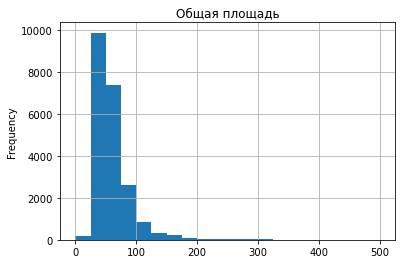

In [43]:
## Общая S

# Просмотрим общую информацию о колонке
data['total_area'].plot(kind='hist', title='Общая площадь', bins=20, grid=True, range=(0,500))
data['total_area'].describe()

<div class="alert alert-info"> 

 - Подавляющее большинство квартир имеют общую площадь до 100м, причем среди них больше всего квартир до 60м.
 - Небольшая часть квартир (меньше 10%) доходит до 20м.
 - Средняя общая площадь квартир в датафрейме - 60м.
 - Минимальная общая S - 12м, максимальная - 900м.

count    21763.000000
mean        34.468619
std         22.036438
min          5.400000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

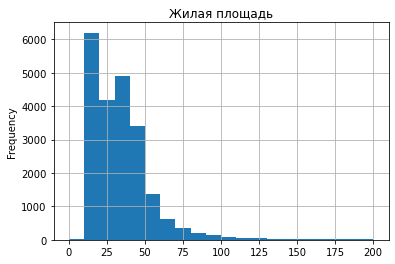

In [44]:
## Жилая S

# Просмотрим общую информацию о колонке
data['living_area'].plot(kind='hist', title='Жилая площадь', bins=20, grid=True, range=(0,200))
data['living_area'].describe()

<div class="alert alert-info"> 
    
 - Наблюдается вполне логичная зависимость между общей и жилой площадью квартир
 - Подавляющее большинство жилой площади квартир находится в диапазоне до 50м.
 - Средний показатель жилой S - 34м.
 - Минимальная жилая S - 5м, максимальная - 571м.

*Пропущено значений площади кухни* - 807


count    20956.000000
mean        10.518381
std          5.845993
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

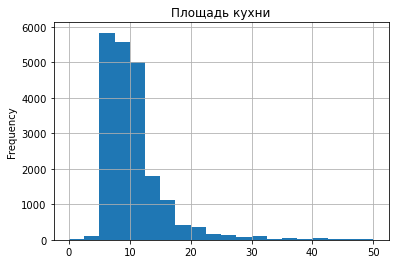

In [45]:
## S кухни

# Не забудем о том, что в колонке есть пропущенные значения
# Пропущено не так много значений, поэтому это несущественно повлияет на достоверность результатов
print('*Пропущено значений площади кухни* - {0}'.format(data['kitchen_area'].isna().sum()))

# Просмотрим общую информацию о колонке
data['kitchen_area'].plot(kind='hist', title='Площадь кухни', bins=20, grid=True, range=(0,50))
data['kitchen_area'].describe()

<div class="alert alert-info">  
 
 - Самая распространенная площадь кухни - от 5 до 12м.
 - Средняя площадь кухни - 10м.
 - Минимальная площадь кухни - 1м, максимальная - 112м. Причем минимальная площадь скорее похожа на аномальное значение.

count     21763.000000
mean       6501.477094
std       10867.071639
min          12.000000
25%        3450.000000
50%        4650.000000
75%        6750.000000
max      763000.000000
Name: last_price, dtype: float64

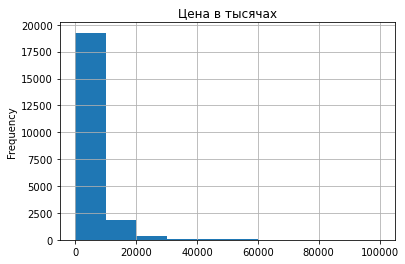

In [46]:
## Цена объекта

# Просмотрим общую информацию о колонке
data['last_price'].plot(kind='hist', title='Цена в тысячах', bins=10, grid=True, range=(0,100000))
data['last_price'].describe()

 <div class="alert alert-info"> 
 
 - Подавляющее большинство квартир в датафрейме имеет цену до 10млн.
 - Средляя цена недвижимости - 6.5млн.
 - Минимальная цена - 12тыс, максимальная - 763млн.

count    21763.000000
mean         2.072416
std          1.080482
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

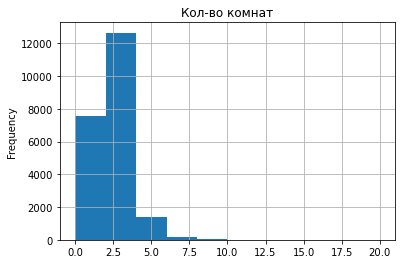

In [47]:
## Кол-во комнат

# Просмотрим общую информацию о колонке
data['rooms'].plot(kind='hist', title='Кол-во комнат', bins=10, grid=True, range=(0,20))
data['rooms'].describe()

 - Большинство недвижимости имеет 1-3 комнаты.
 - Среднее кол-во комнат - 2.
 - В некоторых объектах комнат нет (скорее всего, идет речь о квартирах-студиях).
 - Максимальное кол-во комнат - 19.

In [1]:
## Высота потолков

# Просмотрим общую информацию о колонке
data['ceiling_height'].plot(kind='hist', title='Высота потолков', bins=20, grid=True, range=(2,5))
data['ceiling_height'].describe()

NameError: name 'data' is not defined

<div class="alert alert-info"> 
    
 - Средняя высота потолков - 2.7м. и большинство недвижимости имеет высоту полотков 2.6-2.7м.
 - Минимальная высота полотков - 2м, максимальная - 8.3м.

count    21763.000000
mean         5.889124
std          4.867066
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

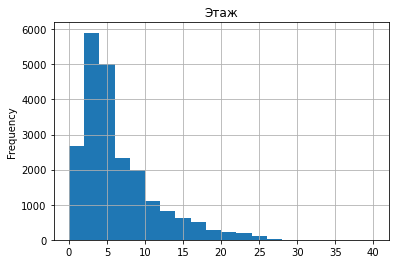

In [50]:
## Этаж квартиры

# Просмотрим общую информацию о колонке
data['floor'].plot(kind='hist', title='Этаж', bins=20, grid=True, range=(0,40))
data['floor'].describe()

 <div class="alert alert-info"> 
 
 - Распределение недвижимости по этажам достаточно обширное, однако большинство квартир находятся на высоте до 8 этажа.
 - В среднем квартиры находятся на высоте 5 этажа.
 - Самый низкий этаж - 1, самый высокий - 33.

другой       16024
последний     3077
первый        2662
Name: type_floor, dtype: int64

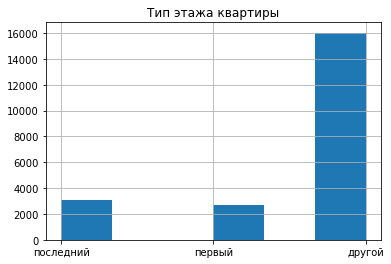

In [51]:
# Тип этажа квартиры

# Просмотрим общую информацию о колонке
data['type_floor'].hist(bins=6)
plt.title('Тип этажа квартиры')

data['type_floor'].value_counts()

<div class="alert alert-info">  
 
 - На первом и последнем этаже находится около 30% недвижимости, остальная часть - на других этажах.
 - Квартир на последнем этаже в выборке немного больше, чем на первом.

count    21763.000000
mean        10.620135
std          6.577319
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

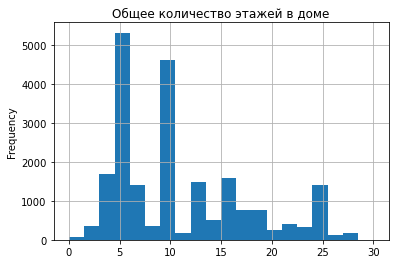

In [52]:
## Общее количество этажей в доме

# Просмотрим общую информацию о колонке
data['floors_total'].plot(kind='hist', title='Общее количество этажей в доме', bins=20, grid=True, range=(0,30))
data['floors_total'].describe()

 <div class="alert alert-info"> 
 
 - Несмотря на достаточно большой разброс значений, большинство недвижимости находится в домах высотой 5-10 этажей.
 - Среднее кол-во этажей в доме - 10.
 - Самый низкий дом - всего 1 этаж (учтем, что 0 - это ранее заполненные пропуски), самый высокий - 60.

*Пропущено значений* - 4885


count    16878.000000
mean     14237.221531
std       8664.203611
min        181.000000
25%       9289.000000
50%      13108.500000
75%      16275.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

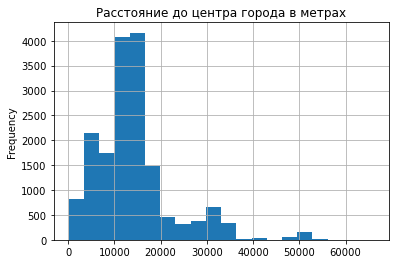

In [53]:
# Расстояние до центра города в метрах

# Не забудем о том, что в колонке есть пропущенные значения
# Пропущено около 20% значений - данные могут не совсем точно отражать действительность.
print('*Пропущено значений* - {0}'.format(data['cityCenters_nearest'].isna().sum()))

# Просмотрим общую информацию о колонке
data['cityCenters_nearest'].plot(kind='hist', title='Расстояние до центра города в метрах', bins=20, grid=True)
data['cityCenters_nearest'].describe()

<div class="alert alert-info"> 
    

 - Диапазон разброса недвижимости по расстоянию до центра достаточно внушительный - более 65 км.
 - Большинство недвижимости находится на расстоянии до 20км. от центра города, причем больше всего в диапазоне 10-20км.
 - В среднем расстрояние до центра составляет 13км.
 - Самая близкая к центру недвижимость находится почти в центре - на расстоянии 181м. от него;
 - Самая дальняя - более 65км. от центра.

*Пропущено значений* - 4906


count    16857.000000
mean     28768.160289
std      12650.562515
min          0.000000
25%      18539.000000
50%      26662.000000
75%      37228.000000
max      84869.000000
Name: airports_nearest, dtype: float64

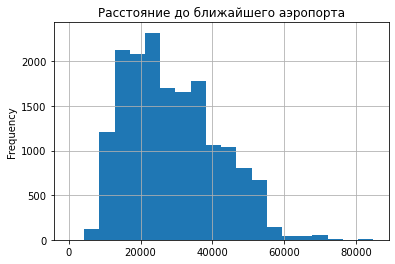

In [54]:
# Расстояние до ближайшего аэропорта

# Не забудем о том, что в колонке есть пропущенные значения
# Пропущено около 20% значений - данные могут не совсем точно отражать действительность.
print('*Пропущено значений* - {0}'.format(data['airports_nearest'].isna().sum()))

# Просмотрим общую информацию о колонке
data['airports_nearest'].plot(kind='hist', title='Расстояние до ближайшего аэропорта', bins=20, grid=True)
data['airports_nearest'].describe()

 <div class="alert alert-info"> 
 
 - Диапазон разброса недвижимости по расстоянию до аэропорта не менее внушительный, чем в предыдущей колонке - почти 85 км.
 - Большинство недвижимости находится в 20-30км. от аэропорта.
 - Среднее расстояние до ближайшего аэропорта в выборке - около 29км.
 - Один объект находится в непосредственной близости от аэропота, а самый дальний - в 84км. от него

*Пропущено значений* - 14272


count    7491.000000
mean      487.827126
std       337.851956
min         1.000000
25%       287.000000
50%       451.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

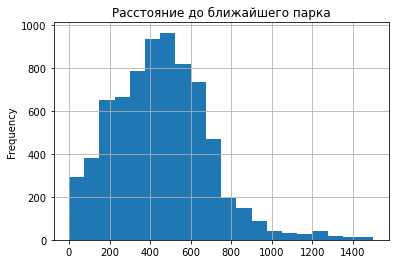

In [55]:
# Расстояние до ближайшего парка

# Не забудем о том, что в колонке есть пропущенные значения
# Пропущено более 60% значений - по имеющимся данным очень трудно делать реалистичные выводы.
print('*Пропущено значений* - {0}'.format(data['parks_nearest'].isna().sum()))

# Просмотрим общую информацию о колонке
data['parks_nearest'].plot(kind='hist', title='Расстояние до ближайшего парка', bins=20, grid=True, range=(0,1500))
data['parks_nearest'].describe()

 <div class="alert alert-info"> 
 
 - Пропущено более 60% данных по расстоянию до ближайшего парка - возможно, внушительная часть недвижимости не имеет парка вблизи от себя; кроме того, возможно, что данный параметр не считается важным для размещающих объявление по сравнению с другими параметрами.
   - Из оставшихся 40% можно сделать такие выводы:
 - В большинстве случаев парк находится на расстоянии до 600м.
 - Среднее расстояние до парка - около 500м.\
 - Объект с самым ближайшим парком находится от него в непосредственноц близости - 1м
 - Самый дальний указанный парк находится на расстоянии 3км. от недвижимости.

Text(0.5, 1.0, 'День и месяц публикации объявления')

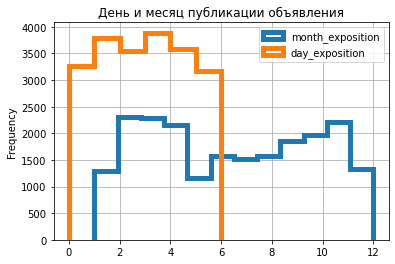

In [85]:
# День и месяц публикации объявления.

ax = data['month_exposition'].plot(kind='hist', bins=12, grid=True, histtype='step', linewidth=5, legend=True)
data['day_exposition'].plot(kind='hist', bins=6, grid=True, histtype='step', linewidth=5, legend=True, ax=ax)
plt.title('День и месяц публикации объявления')

 <div class="alert alert-info"> 
 
 - Распределение по дню и месяцу публикации достаточно плавное.
 - Чаще всего объявления появлялись весной и осенью.
 - В понедельник и воскресенье появлялось меньше всего объявлений

 <div class="alert alert-success" role="alert">

 **Общий итог по параметрам недвижимости**
 
 - Большинство недвижимости:
    
 - Общей площадью 30-60м - с жилой площадью 10-40м и кухней размером 5-12м.
 - Имеют 1-3 комнаты (в среднем 2) и высоту потолков 2.5-3м. 
 - Находятся на высоте до 8 этажа в домах высотой 5-10 этажей, причем на первом и последнем этаже находится всего около 30% недвижимости.
 
 - Цена недвижимости в основном распределена до 10млн., в среднем - 6.5млн.

 - Большинство недвижимости находится на расстоянии 10-20км. от центра города и 20-30км. от аэропорта.
 - Внушительная часть недвижимости (60%) не имеет информации о нахождении парка вблизи от себя; возможно, что данный параметр не считается важным при продаже или просто говорит об отсутствии парка рядом.
 - В большинстве остальных случаев парк находится на расстоянии до 600м.

 - Распределение по дню и месяцу публикации объявлений о продаже недвижимости достаточно плавное, однако чаще всего объявления появлялись весной и осенью.

## Как быстро продавались квартиры 

*Пропущено значений* - 2977


<AxesSubplot:title={'center':'Скорость продажи квартир в днях'}, ylabel='Frequency'>

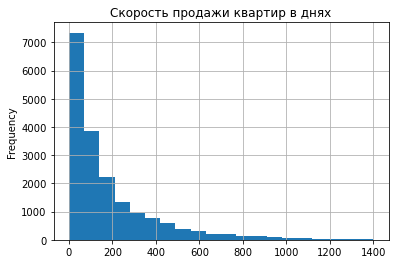

In [57]:
# Оценим кол-во пропусков данных
print('*Пропущено значений* - {0}'.format(data['days_exposition'].isna().sum()))

# Выведем гистограмму продажи квартир в днях
data['days_exposition'].plot(kind='hist', title='Скорость продажи квартир в днях', grid=True, bins=20, range=(0,1400))

In [58]:
# Посчитаем среднее и медиану

print('Средняя скорость продажи в днях - {0}'.format(int(data['days_exposition'].mean())))
print('Медиана скорости продажи в днях - {0}'.format(int(data['days_exposition'].median())))

Средняя скорость продажи в днях - 184
Медиана скорости продажи в днях - 101


In [59]:
# Посмотрим общую статистическую информацию о скорости продажи квартир

data['days_exposition'].describe()

count    18786.000000
mean       184.962685
std        221.315363
min          1.000000
25%         44.000000
50%        101.500000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-success" role="alert">

  **Вывод**
 
 - Продажа недвижимости занимает в среднем от 3мес. до полугода.
 - Судя по достаточно большой разнице между средним и медианой в скорости продажи квартир существует довольно большой разброс (есть слишком большие или слишком маленькие значения).
 
 
 - Оценить слишком быстрые или очень медленные продажи было бы целесообразно с помощью квартилей.
 - В квартилях Q1 - 45 дней, Q3 - 231 день.
 - Таким образом все продажи, которые заняли меньше, чем 1.5мес. можно назвать быстрыми, а продажи дольше 8мес. - долгими.

## Какие факторы больше всего влияют на стоимость объекта

<div class="alert alert-warning">

Необходимо выяснить, есть ли зависимость между стоимостью и:
 - общей S;
 - жилой S;
 - S кухни;
 - кол-вом комнат;
 - этажом, на котором расположена квартира (первый, последний, другой);
 - датой размещения (день недели, месяц, год).

<AxesSubplot:title={'center':'Зависимость цены от общей S'}, xlabel='total_area'>

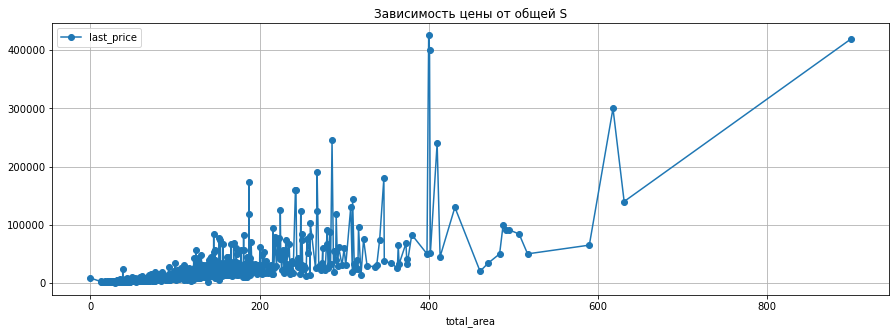

In [60]:
# Цена и общая S

# Для визуализации данных сначала используем сводную таблицу, затем по ней построим гистограмму
(
data
    .pivot_table(index='total_area', values='last_price')
    .plot(title='Зависимость цены от общей S', style='o-', grid=True, figsize=(15,5))
)

<AxesSubplot:title={'center':'Зависимость цены от жилой S'}, xlabel='living_area'>

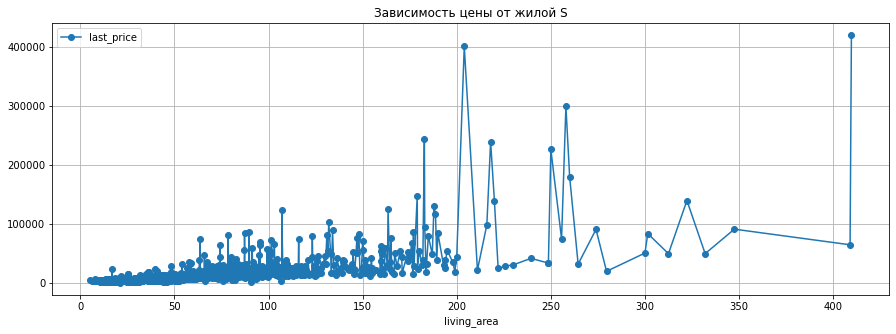

In [61]:
# Цена и жилая S

# Для визуализации данных сначала используем сводную таблицу, затем по ней построим гистограмму
(
data
    .pivot_table(index='living_area', values='last_price')
    .plot(title='Зависимость цены от жилой S', style='o-', grid=True, figsize=(15,5))
)

<AxesSubplot:title={'center':'Зависимость цены от S кухни'}, xlabel='kitchen_area'>

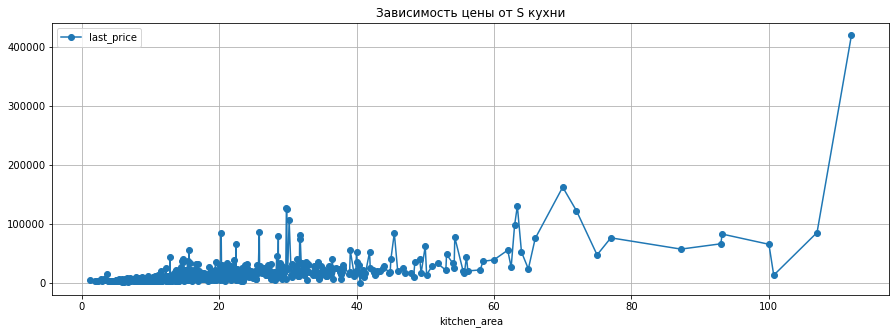

In [62]:
# Цена и S кухни

# Для визуализации данных сначала используем сводную таблицу, затем по ней построим гистограмму
(
data
    .pivot_table(index='kitchen_area', values='last_price')
    .plot(title='Зависимость цены от S кухни', style='o-', grid=True, figsize=(15,5))
)

<div class="alert alert-info">

 - Можно заметить в достаточной мере сильную линейную связь между площадью и ценой объекта. Чем больше S - тем больше цена.
 - Площадь кухни чуть менее влияет на цену объекта по сравнению с общей и жилой площадью. Кроме того, логично предположить, что площадь кухни, а также жилая площадь также имеют зависимость от общей площади объекта.
 - При увеличении S, начиная с определенного момента, цена может резко возрастать (объекты с 400м общей площади, 200м жилой, более 100м площади кухни) - возможно такое влияние на графики оказывают опеределнные объекты, сильно выделяющиеся ценой, т.к. дальнейшее увеличение графиков общей и дилой площади более плавное.

<AxesSubplot:title={'center':'Зависимость цены от кол-ва комнат'}, xlabel='rooms'>

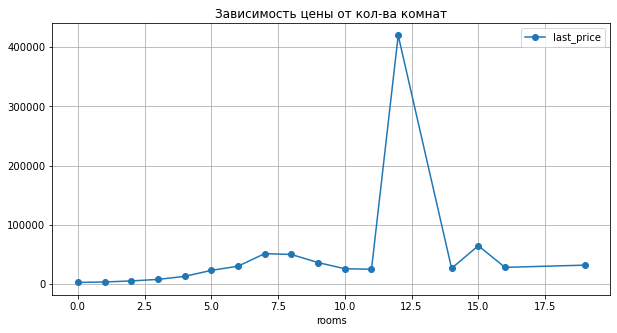

In [63]:
# Цена и кол-во комнат

# Для визуализации данных сначала используем сводную таблицу, затем по ней построим гистограмму
(
data
    .pivot_table(index='rooms', values='last_price')
    .plot(title='Зависимость цены от кол-ва комнат', style='o-', grid=True, figsize=(10,5))
)

<div class="alert alert-info">

- Возрастание цены объекта в зависимости от кол-ва комнат в нем достаточно плавное, за исключением объекта\объектов с 12 комнатами - у них цена сильно завышена, возможно это связано с расположением объекта или же другими факторами.

<AxesSubplot:title={'center':'Зависимость цены от типа этажа'}, xlabel='type_floor'>

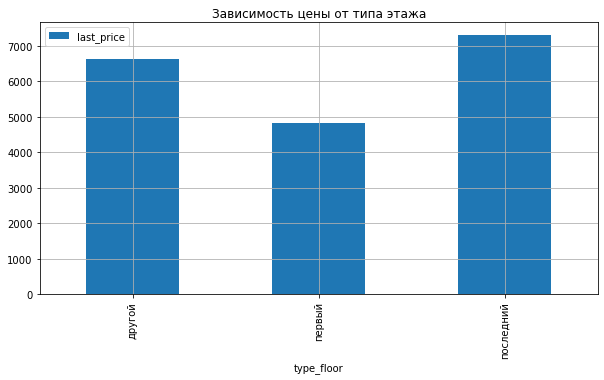

In [64]:
# Цена и этаж 

# Для визуализации данных сначала используем сводную таблицу, затем по ней построим гистограмму
(
data
    .pivot_table(index='type_floor', values='last_price')
    .plot(kind='bar', title='Зависимость цены от типа этажа', grid=True, figsize=(10,5))
)

<div class="alert alert-info">

- Недвижимость на первом этаже имеет более низкую цену. Чем выше этаж, тем выше цена.

<AxesSubplot:title={'center':'Зависимость цены от даты'}, xlabel='first_day_exposition'>

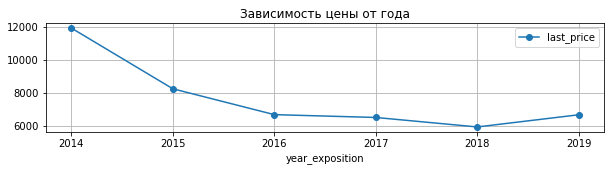

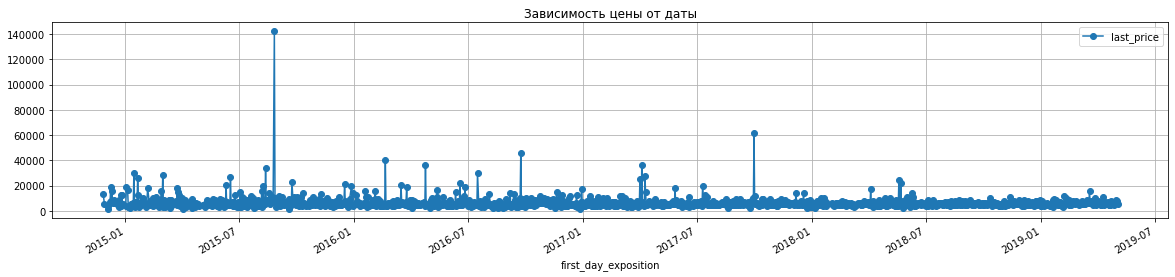

In [65]:
# Цена и дата размещения 

# Для визуализации данных сначала используем сводную таблицу, затем по ней построим гистограмму
# Сначала посмотрим общее распределение по годам
(
data
    .pivot_table(index='year_exposition', values='last_price')
    .plot(title='Зависимость цены от года', style='o-', grid=True, figsize=(10,2))
)
# Затем распределение по датам (день, месяц, год)
(
data
    .pivot_table(index='first_day_exposition', values='last_price')
    .plot(title='Зависимость цены от даты', style='o-', grid=True, figsize=(20,4))
)

<div class="alert alert-info"> 
 
 - При ориентировке на год размещения объявления о продаже заметно сильное падение цен с 2014 вплоть до 2018 года, затем цены вновь начали возрастать.
 - При более детальном изучении заметен сильный скачок цен в 2015 году. Большинство цен распределено равномерно, однако существуют объявления, сильно выделяющиеся из общей массы своей ценой (дорогие квартиры). 

<AxesSubplot:title={'center':'Распределение общей площади продаваемой недвижимости по годам'}, xlabel='year_exposition'>

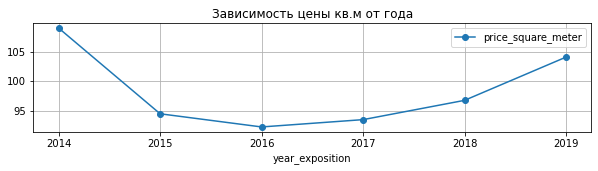

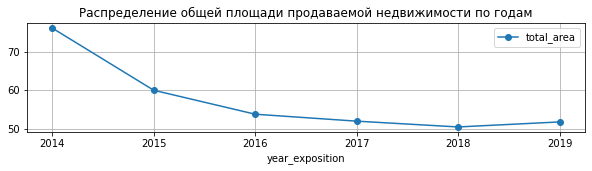

In [83]:
# Проверим зависимость цены кв.м. от даты размещения, а также динамику изменения площади продаваемых квартир по годам

# Зависимость цены кв.м. от даты размещения
(
data
    .pivot_table(index='year_exposition', values='price_square_meter', aggfunc='median')
    .plot(title='Зависимость цены кв.м от года', style='o-', grid=True, figsize=(10,2))
)
# Динамика изменения площади продаваемых квартир по годам
(
data
    .pivot_table(index='year_exposition', values='total_area', aggfunc='median')
    .plot(title='Распределение общей площади продаваемой недвижимости по годам', style='o-', grid=True, figsize=(10,2))
)

<div class="alert alert-info">  
 
 - При более детальном рассмотрении видно, что спад цен (в расчете за 1 кв.м.) продолжался до 2016 года, а затем цены начали расти.
 - По графику распределения площади продаваемых квартир видно, что общий спад цен после 2014 года вызван тем, что продаваемая недвижимость стала обладать меньшей площадью.
 - При этом, несмотря на уменьшающуюся площадь, цены на недвижимость в целом стали довольно сильно возрастать после 2016 года.

## Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [70]:
# Обратим внимание, что в названиях населенных пунктов есть название 'посёлок', без указания названия
# Исключим его датафрайма для проведения анализа

print('Населенных пунктов "посёлок" - {0}'.format(data.loc[data['locality_name'] == 'посёлок', 'locality_name'].count()))
data = data.loc[data['locality_name'] != 'посёлок']
print('Анализ проведется для {0} населенных пунктов'.format(data['locality_name'].count()))

Населенных пунктов "посёлок" - 507
Анализ проведется для 21256 населенных пунктов


In [71]:
# Выведем топ-10 населенных пунктов с наибольшим числом объявлений
top_10_locality = data['locality_name'].value_counts().head(10)
print(top_10_locality)

Санкт-Петербург      14560
Мурино                 490
Кудрово                424
посёлок Шушары         404
Всеволожск             371
Пушкин                 345
Колпино                328
посёлок Парголово      301
Гатчина                291
Петергоф               197
Name: locality_name, dtype: int64


In [72]:
# Преобразуем Series в словарь для последующей работы
top_10_locality = top_10_locality.to_dict()
print(top_10_locality)

{'Санкт-Петербург': 14560, 'Мурино': 490, 'Кудрово': 424, 'посёлок Шушары': 404, 'Всеволожск': 371, 'Пушкин': 345, 'Колпино': 328, 'посёлок Парголово': 301, 'Гатчина': 291, 'Петергоф': 197}


In [73]:
# Создадим цикл, который пройдет по топ-10 населенным пунктам и вычислит среднюю цену за кв.м., разделив цену на плодащь объекта

means_top_10 = [] # Список вернет среднюю цену кв. метра по топ-10 населенным пунктам 
for name in top_10_locality: 
    means_top_10.append(data.loc[data['locality_name'] == name, 'price_square_meter'].mean())

print(means_top_10) 

[114.15628188181823, 86.68589814013343, 95.71557046594083, 78.886349014096, 68.87959622975258, 103.42835116076598, 75.34391267167285, 90.44248404609229, 68.63906454375096, 84.480969943731]


In [74]:
# Создадим датафрейм, который будет хранить имя населенного пункта, кол-во объявлений и среднюю цену на кв.м.

mean_price_top_10 = pd.DataFrame.from_dict(top_10_locality, orient='index')
mean_price_top_10 .columns=['Кол-во объявлений']
mean_price_top_10['Средняя цена за кв.м.'] = means_top_10
print(mean_price_top_10)

                   Кол-во объявлений  Средняя цена за кв.м.
Санкт-Петербург                14560             114.156282
Мурино                           490              86.685898
Кудрово                          424              95.715570
посёлок Шушары                   404              78.886349
Всеволожск                       371              68.879596
Пушкин                           345             103.428351
Колпино                          328              75.343913
посёлок Парголово                301              90.442484
Гатчина                          291              68.639065
Петергоф                         197              84.480970


<AxesSubplot:title={'center':'Средняя цена за кв.м.(в тысячах)\n Топ-10 популярных населенных пунктов'}>

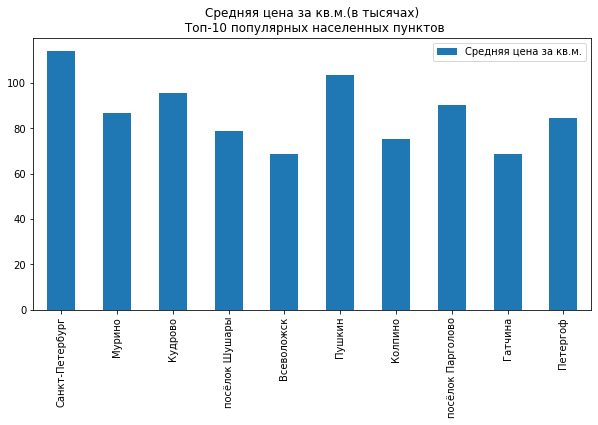

In [75]:
# Построим график, показывающий распределение цены за кв.м по населенным пунктам

mean_price_top_10.plot(
    kind='bar', 
    title='Средняя цена за кв.м.(в тысячах)\n Топ-10 популярных населенных пунктов', 
    y='Средняя цена за кв.м.',
    figsize=(10,5)
)

<div class="alert alert-info"> 
 
 - Самая высокая цена за кв.м. ожидаемо в Санкт-Петербурге - 114тыс. за кв.м.
 - Второй самый дорогой населенный пункт - Пушкин.
 - Самое дешевое жилье в Выборге - 58тыс. за кв.м.

##  Средняя цена каждого километра (Санкт-Петербург)

In [76]:
# Будем работать только с данными по Санкт-Петербургу, а также отсортируем датафрейм по расстоянию в километрах
# Затем создадим цикл, который пройдется по всем уникальным значениям км в Санкт-Петербурге и выведет для них среднюю цену

data_piter = data.loc[data['locality_name'] == 'Санкт-Петербург']
data_piter = data_piter.sort_values(by='centre_distance')

means_km = [] # Список вернет среднюю цену от дальности в км.
for km in data_piter['centre_distance'].unique():
    means_km.append(data_piter.loc[data_piter['centre_distance'] == km, 'last_price'].mean())

print(means_km)

[23827.975, 19136.754464285714, 16522.825342465752, 13220.850806451614, 13091.650966183575, 14850.59649122807, 13412.483009708738, 13015.419689119171, 8417.860841423948, 6432.276995305165, 6353.4617224880385, 5942.5571321882, 5986.936842105263, 6006.9583963691375, 5698.208540925267, 5563.739332816137, 5475.151811949069, 4899.7330595482545, 5428.441717791411, 4680.641975308642, 6169.757575757576, 5032.578313253012, 5326.704918032787, 4196.642857142857, 3883.684210526316, 4013.8115942028985, 3575.0, 8300.0, 4910.5, 3833.3333333333335, nan]


<AxesSubplot:title={'center':'Распределение цены от дальности центра Санкт-Петербурга'}, xlabel='Кол-во км. от центра', ylabel='Цена'>

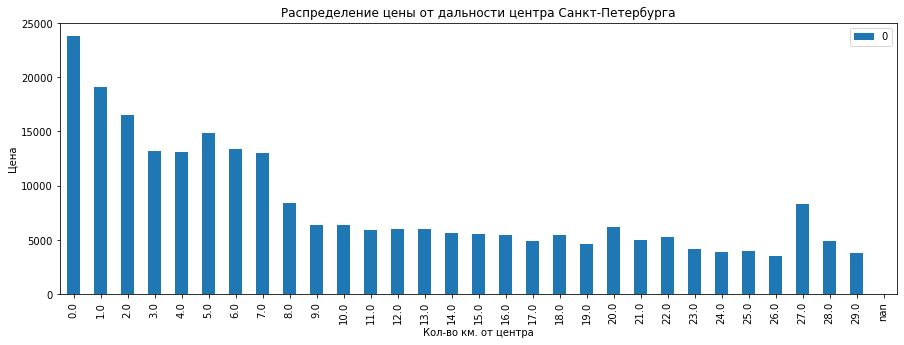

In [77]:
# Создадим датафрейм и построим по нему график распределения цены от дальности расположения

means_piter_km_price = pd.DataFrame(data=means_km, index=data_piter['centre_distance'].unique())
means_piter_km_price.plot(kind='bar', 
                          title='Распределение цены от дальности центра Санкт-Петербурга', 
                          xlabel='Кол-во км. от центра',
                          ylabel='Цена',
                          figsize=(15,5)
                         )

<div class="alert alert-info">
    
 - Учтем, что для подготовки данных (в том числе замены некоторых пропусков в колонке locality_name ранее) центральная точка условно взята как район Дворцовой площади, т.к. в описании датасета это не указан точный объект.
    
    
 - В целом наблюдается общая тенденция - чем ближе к центру находится объект, тем выше у него цена.
 - Есть несколько выделяющихся на общем фоне объектов (особенно резкое повышение цены на 27км.), однако это может быть связано с другими факторами - например, данные объект выделяется площадью по сравнению с остальными, поэтому его цена выше.

# Общий вывод

<div class="alert alert-danger" role="alert">


**Общие особенности недвижимости**
   
   Большинство объектов:

 - Общей площадью 30-60м, с жилой площадью 10-40м и кухней размером 5-12м.
 - Имеют 1-3 комнаты и высоту потолков 2.5-3м. 
 - Находятся на высоте до 8 этажа в домах высотой 5-10 этажей, причем на первом и последнем этаже находится всего около 30% недвижимости.
  
  
 - Цена в основном распределена до 10млн., в среднем - 6.5млн.
 - Большинство недвижимости находится на расстоянии 10-20км. от центра города и 20-30км. от аэропорта.
 - Внушительная часть недвижимости (60%) не имеет информации о нахождении парка вблизи от себя; возможно, что данный параметр не считается важным при продаже или просто говорит об отсутствии парка рядом. В большинстве остальных случаев парк находится на расстоянии 600м.


 **Особенности продажи недвижимости**
 - Распределение по дню и месяцу у публикаций объявлений о продаже достаточно плавное, однако чаще всего объявления появлялись весной и осенью.
 - Продажа занимает в среднем от 3мес. до полугода.
 - Судя по достаточно большой разнице между средним и медианой в скорости продажи квартир существует довольно большой разброс (есть слишком быстрые или слишком долгие продажи).
 - Продажи, которые заняли меньше, чем 1.5мес. можно назвать быстрыми, а продажи дольше 8мес. - долгими.
 
 
 **Связь цены и параметров недвижимости**
 
 
*Площадь недвижимости*
 - Существует достоточно сильная связь между площадью и ценой объекта. Чем больше площадь - тем больше цена.
 - Площадь кухни чуть менее влияет на цену объекта по сравнению с общей и жилой площадью.
 
*Этаж недвижимости*
 - Недвижимость на первом этаже имеет более низкую цену. Чем выше этаж, тем выше цена.
 
*Расположение недвижимости*
 - Достаточно сильно выделяется тенденция - чем ближе к центру находится объект, тем выше у него цена.
 - Самая высокая цена за кв.м. ожидаемо в Санкт-Петербурге - 114тыс. за кв.м.; второй самый дорогой населенный пункт - Пушкин.
 - Самое дешевое жилье в Выборге - 58тыс. за кв.м.

    
*Год продажи*
 - Заметно падение цен на недвижимость с 2014 до 2016 года в расчете за 1кв.м., затем цены начали довольно сильно расти. 
 - Плодащь продаваемой недвижимости с 2014 по 2018 года уменьшалась, поэтому уменьшалась и общая сумма продаж.